## What we found out-
* WE FOUND OUT THAT ON THE COLUMS THAT START WITH 'PARTICIPANT' CONTAIN A LIST OF PEOPLE.
* THIS DATA IS FROM JAN/01/ 2013 - MARCH/31/ 2018.
* THE DATA IS ONLY FROM THE USA.
* MOST OF THE GUN TYPES ARE NUN.
* WE HAVE 29 COLUMNS.
* WE ARE DEALING WITH 239,677 ROWS.



### Questions
1. what type of incident occured the most.
2. what age group was mostly involved in the shootings.
3. make a heatmap that depicts the shooting in each state.
4. how does the age group and the number of people killed correspond.
5. which day of the week do most shooting happen.
8. which gun type was mostly used in the shootings.
9. what states used that gun the most.
11. what relationship caused most of the shootings.
12. how many guns were used in the shootings.

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import plotly.express as px
import datetime as dt
import copy
from datetime import datetime
%matplotlib inline



In [2]:
data_frame = pd.read_csv('GUN VIOLECE_2013_to_2018.csv')
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [3]:
data_frame = data_frame.drop('sources', axis=1)
data_frame = data_frame.drop('incident_url_fields_missing', axis=1)
data_frame = data_frame.drop('incident_url', axis=1)
data_frame = data_frame.drop('source_url', axis=1)


In [4]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [5]:
data_frame.n_killed.max()

50

In [6]:
data_frame['date'] = pd.to_datetime(data_frame.date)

In [7]:
data_frame.dtypes

incident_id                          int64
date                        datetime64[ns]
state                               object
city_or_county                      object
address                             object
n_killed                             int64
n_injured                            int64
congressional_district             float64
gun_stolen                          object
gun_type                            object
incident_characteristics            object
latitude                           float64
location_description                object
longitude                          float64
n_guns_involved                    float64
notes                               object
participant_age                     object
participant_age_group               object
participant_gender                  object
participant_name                    object
participant_relationship            object
participant_status                  object
participant_type                    object
state_house

In [8]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [9]:
data_frame.participant_type

0         0::Victim||1::Victim||2::Victim||3::Victim||4:...
1         0::Victim||1::Victim||2::Victim||3::Victim||4:...
2         0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3         0::Victim||1::Victim||2::Victim||3::Subject-Su...
4         0::Victim||1::Victim||2::Victim||3::Subject-Su...
                                ...                        
239672                                   0::Subject-Suspect
239673                        0::Victim||1::Subject-Suspect
239674                                            0::Victim
239675                                            0::Victim
239676                        0::Victim||1::Subject-Suspect
Name: participant_type, Length: 239677, dtype: object

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   incident_id               239677 non-null  int64         
 1   date                      239677 non-null  datetime64[ns]
 2   state                     239677 non-null  object        
 3   city_or_county            239677 non-null  object        
 4   address                   223180 non-null  object        
 5   n_killed                  239677 non-null  int64         
 6   n_injured                 239677 non-null  int64         
 7   congressional_district    227733 non-null  float64       
 8   gun_stolen                140179 non-null  object        
 9   gun_type                  140226 non-null  object        
 10  incident_characteristics  239351 non-null  object        
 11  latitude                  231754 non-null  float64       
 12  lo

In [11]:
gun_type = data_frame.gun_type.dropna()

In [12]:
data_frame.describe()


,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [13]:
data_frame = data_frame.drop_duplicates(subset=['incident_id'])

In [14]:
data_frame

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,0::Unknown,0::Unknown,...,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.0,0::Unknown,0::Unknown,...,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.0,0::Unknown,0::Unknown,...,NaN,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.0,0::Unknown,0::Unknown,...,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,149.0,17.0


In [15]:
data_frame[data_frame.n_killed==50]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
130448,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,5.0,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::9mm,...,Names are coming in sporadically and every eff...,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Edward Sotomayor Jr||1::Stanley Almodovar I...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,47.0,12.0


### Turn the column date into an actual date that python can read.

* When the max number of guns were involved there were Zero kills and Zero injuries. I know it sounds fishy so i'll confirm my questions later as we go on.


In [16]:
#data_frame[data_frame.n_guns_involved==400]
data_frame[data_frame.n_guns_involved==400]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
69524,338106,2015-05-11,California,Los Angeles,2379 West Washington Boulevard,0,0,33.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,"Two Locations 2379 West Washington Boulevard, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,26.0
85777,398932,2015-08-20,Florida,Orlando,NaN,0,0,10.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,13.0
95847,437442,2015-10-24,California,San Diego,NaN,0,0,52.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,39.0
98804,449889,2015-11-12,California,Clovis,3679 Etchings Way,0,0,22.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,"State DoJ seized 209 handguns, 88 shotguns, 23...",0::59,0::Adult 18+,0::Male,0::Albert Sheakalee,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,23.0,8.0


In [17]:
data_frame[data_frame.n_killed==50]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
130448,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,5.0,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::9mm,...,Names are coming in sporadically and every eff...,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Edward Sotomayor Jr||1::Stanley Almodovar I...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,47.0,12.0


In [18]:
n_killed = data_frame.n_killed

In [19]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'state')

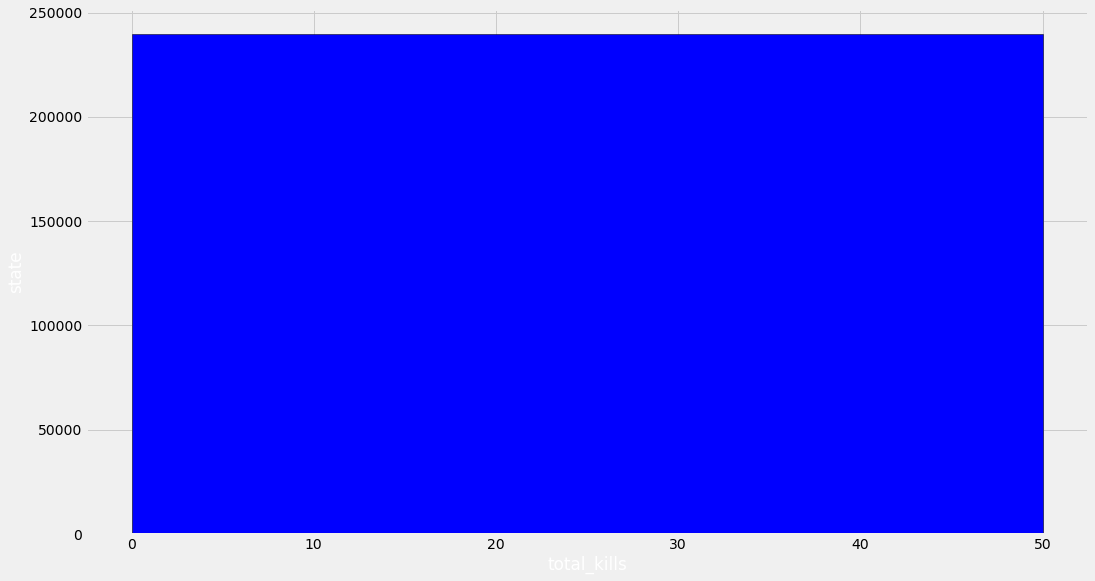

In [20]:
plt.figure(figsize=(16,9))
plt.hist(n_killed, bins=1, edgecolor='black', facecolor='blue')
plt.xlabel('total_kills',color='white')
plt.ylabel('state', color='white')



In [21]:
n_guns_involved = data_frame.n_guns_involved.dropna()

* Columns n_killed, n_injured and n_guns_involved are clean

In [22]:
n_killed = data_frame.n_killed

In [23]:
max(n_killed)

50

In [24]:
n_injured = data_frame.n_injured

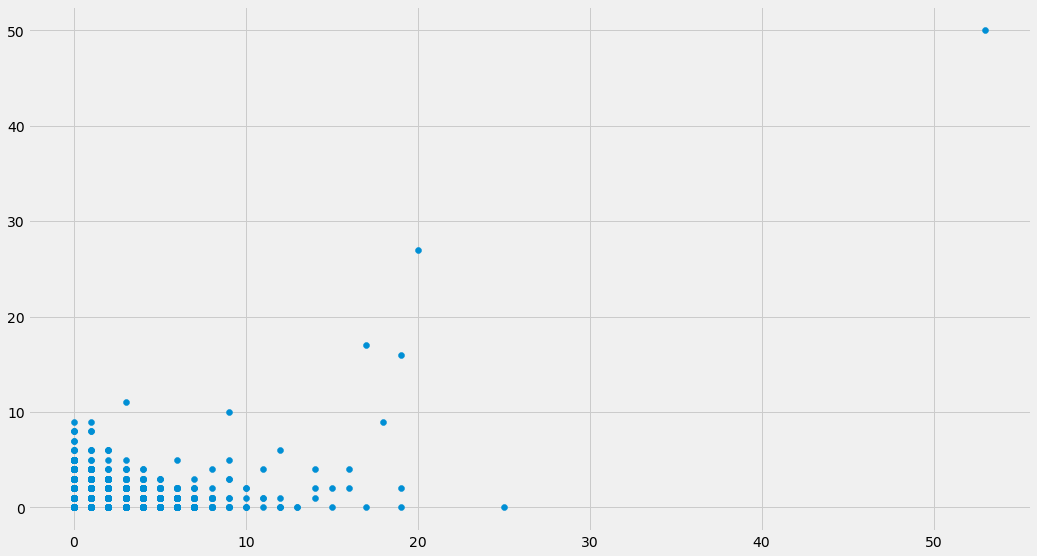

In [25]:
plt.figure(figsize=(16,9))
plt.scatter(n_injured, n_killed)
plt.show()

In [26]:
gun_type = data_frame.gun_type.dropna()

In [27]:
gun_type.value_counts()

0::Unknown                                                                                                                                                                                                          93559
0::Handgun                                                                                                                                                                                                          13018
0::9mm                                                                                                                                                                                                               4599
0::Unknown||1::Unknown                                                                                                                                                                                               2410
0::22 LR                                                                                                                        

In [28]:
import seaborn as sns

In [29]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [30]:
data_frame.n_killed

0         0
1         1
2         1
3         4
4         2
         ..
239672    0
239673    1
239674    0
239675    1
239676    2
Name: n_killed, Length: 239677, dtype: int64

In [31]:
state_count = data_frame.state.value_counts()

In [32]:
state_index = data_frame.state.value_counts().index

([<matplotlib.patches.Wedge at 0x174dd3010>,
 [Text(0.9055375722315677, 0.6245011651526027, 'Illinois'),
  Text(-0.21578412845202818, 1.0786274657675832, 'California'),
  Text(-1.0522420267705626, 0.3206036760515681, 'Florida'),
  Text(-0.849770557070206, -0.6984912313956361, 'Texas'),
  Text(-0.06991680314060382, -1.0977757697447135, 'Ohio'),
  Text(0.6415313499072433, -0.893553315189525, 'New York'),
  Text(1.0485473786253696, -0.3324881874260587, 'Pennsylvania')],
 [Text(0.49392958485358235, 0.3406369991741469, '19.22%'),
  Text(-0.11770043370110626, 0.5883422540550453, '17.85%'),
  Text(-0.5739501964203068, 0.17487473239176438, '16.45%'),
  Text(-0.463511212947385, -0.38099521712489237, '14.86%'),
  Text(-0.03813643807669299, -0.5987867834971164, '11.21%'),
  Text(0.34992619085849624, -0.48739271737610446, '10.63%'),
  Text(0.5719349337956561, -0.18135719314148652, '9.77%')])

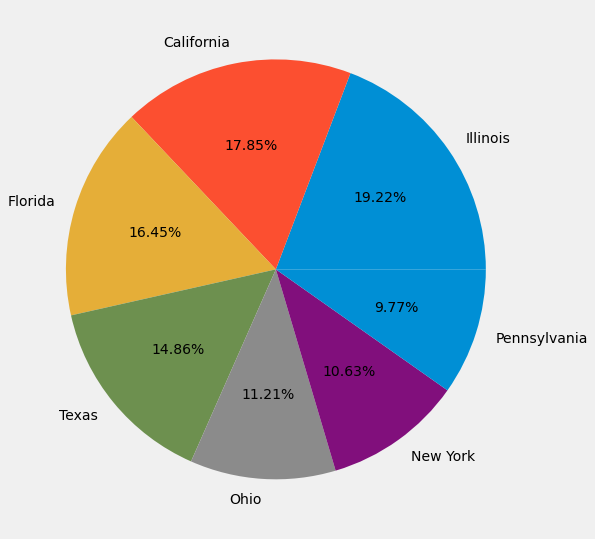

In [33]:
plt.figure(figsize=(16,9))
plt.pie(x=state_count[:7], labels=state_index[:7], autopct='%1.2f%%')

## FINDINGS ON THE STATES AND THEIR RECORD OF SHOOTINGS.
* The top FIVE state with the most shootings are:
   1.Illinois
   2.California
   3.Florida
   4.Texas
   5.Ohio

In [34]:
n_kills = data_frame.n_killed.value_counts()

In [35]:
n_killes = data_frame.n_killed

<AxesSubplot:xlabel='n_killed', ylabel='n_killed'>

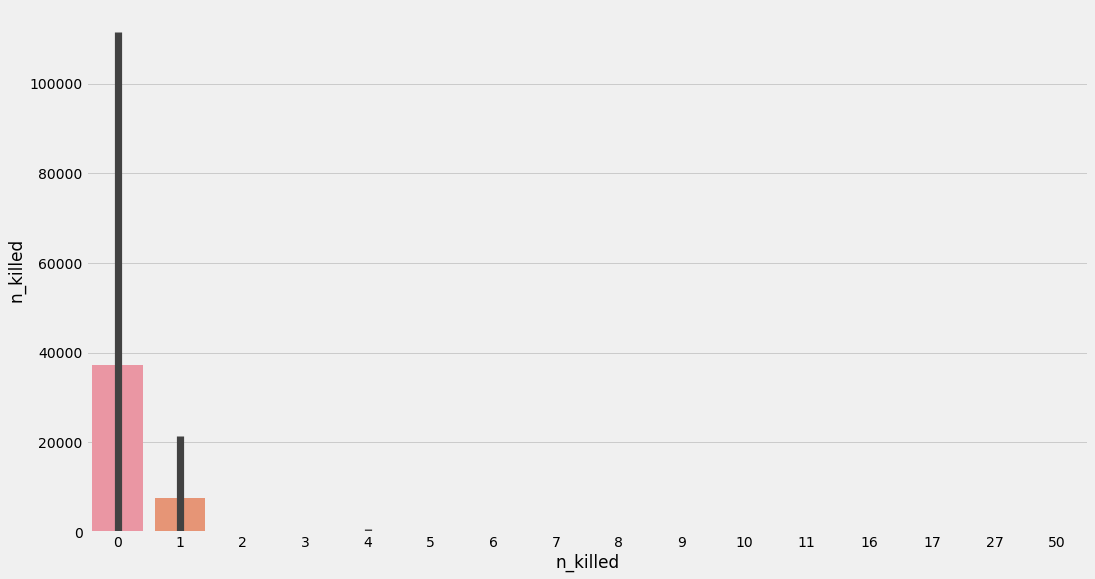

In [36]:
plt.figure(figsize=(16,9))
sns.barplot(x=n_killes, y=n_kills)

In [37]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district'],
      dtype='object')

## truning date into years

In [38]:
data_frame['year'] = pd.DatetimeIndex(data_frame.date).year
    

In [39]:
year_name = data_frame['year'].unique()
year_name

array([2013, 2014, 2015, 2016, 2017, 2018])

In [40]:
count_year = data_frame['year'].value_counts().rename('count')

In [41]:
count_year

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: count, dtype: int64

* 2017 had the most killings while 2013 had the least killings
* The max killing in one shooting is 50 people
* The max shooting in a year is 61401



In [42]:
year_people_killed = data_frame['n_killed'].groupby([data_frame['year']]).size()

In [43]:
year_people_killed

year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: n_killed, dtype: int64

In [44]:
fig = px.histogram(data_frame, x="n_killed")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<AxesSubplot:ylabel='n_killed'>

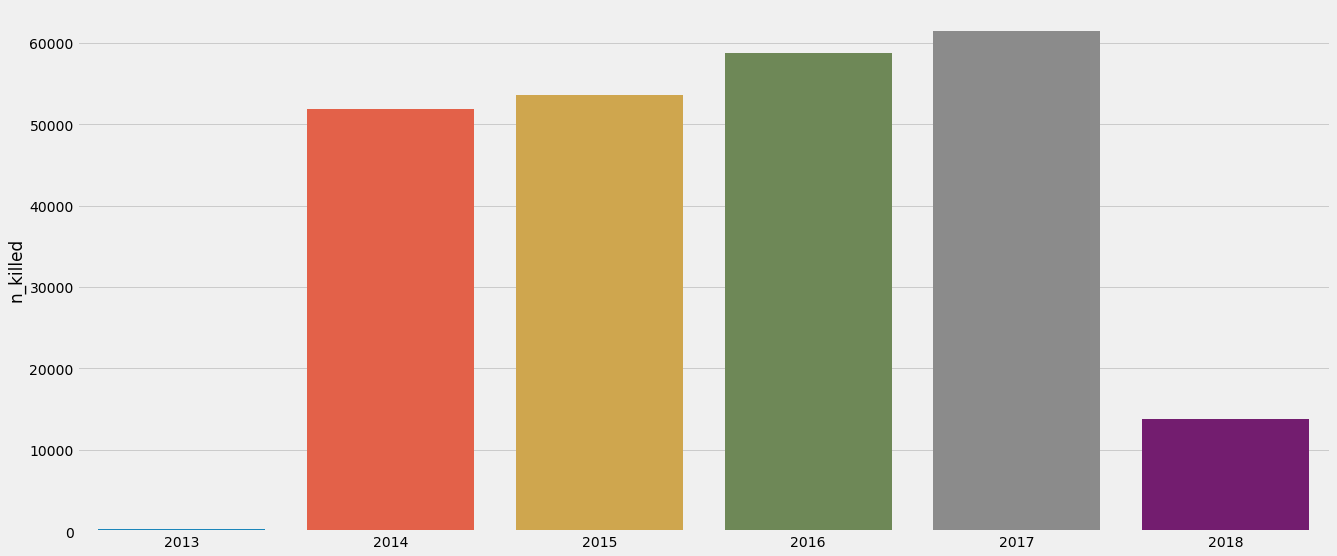

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x=year_name, y=year_people_killed)

* why are 2013 and 2018 the lowest.
* do we have the full records for the year or just a few months(that could be the reason)

In [ ]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'year'],
      dtype='object')

In [ ]:
n_injured= data_frame['n_injured'].groupby([data_frame['year']]).size()

In [ ]:
year_people_killed

year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: n_killed, dtype: int64

In [ ]:
n_injured

year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: n_injured, dtype: int64

<AxesSubplot:ylabel='n_injured'>

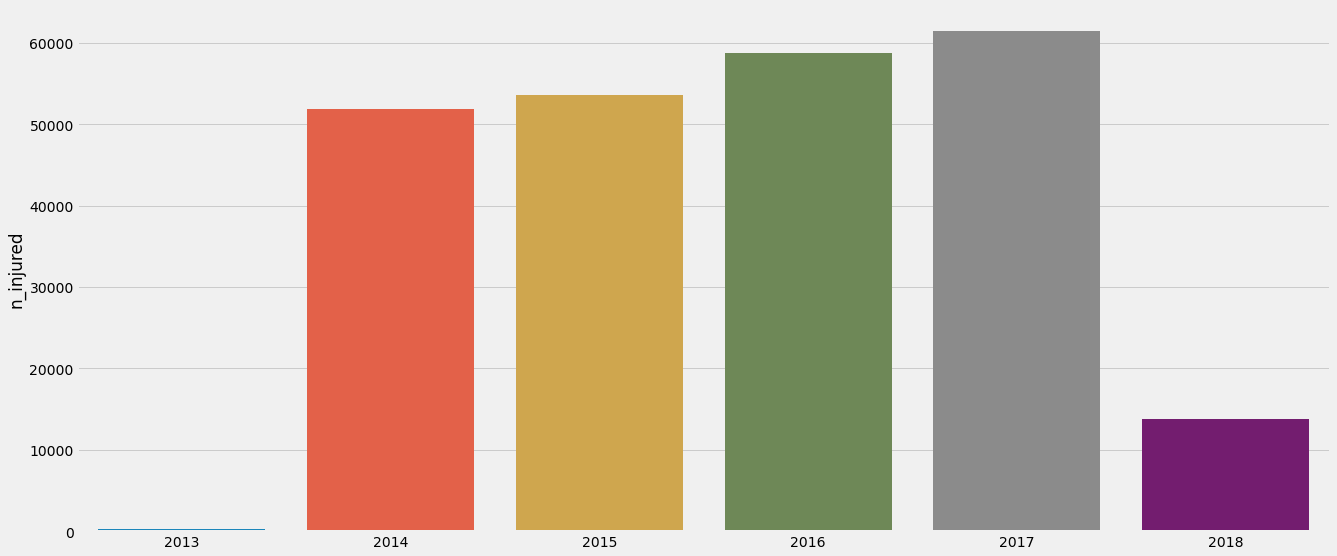

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x=year_name, y=n_injured)

## why is n_killed and n_injured the same. is it the data or my code!!
* it is my code maybe

In [ ]:
data_frame.n_killed

0         0
1         1
2         1
3         4
4         2
         ..
239672    0
239673    1
239674    0
239675    1
239676    2
Name: n_killed, Length: 239677, dtype: int64

In [ ]:
data_frame.n_injured

0         4
1         3
2         3
3         0
4         2
         ..
239672    0
239673    0
239674    1
239675    0
239676    0
Name: n_injured, Length: 239677, dtype: int64

## turning date into months

In [ ]:
data_frame['month']=pd.DatetimeIndex(data_frame.date).month

In [ ]:
n_killed_month= data_frame['n_killed'].groupby([data_frame['month']]).size()

In [ ]:
n_killed_month

month
1     23091
2     18841
3     22640
4     18628
5     19930
6     18755
7     21126
8     21040
9     19656
10    19890
11    17974
12    18106
Name: n_killed, dtype: int64

In [ ]:
months= data_frame.date.dt.strftime("%B").unique()

<AxesSubplot:ylabel='n_killed'>

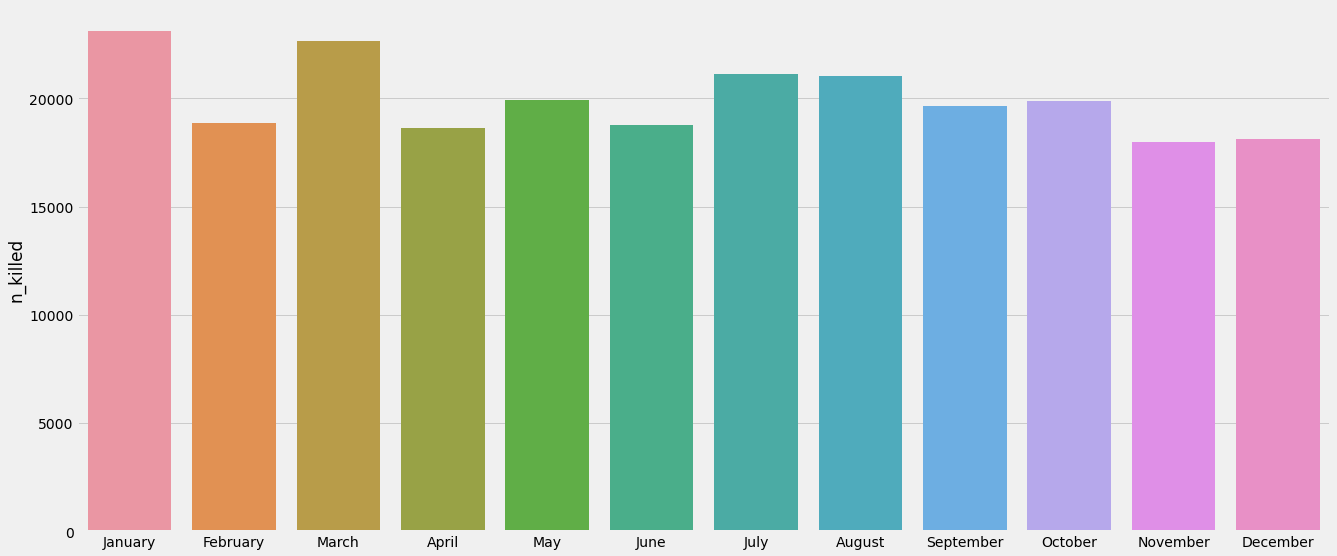

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(x=months, y=n_killed_month)

* The months with the most killings are Jan and March.

In [ ]:
data_frame.date.dt.strftime("%B")

0         January
1         January
2         January
3         January
4         January
           ...   
239672      March
239673      March
239674      March
239675      March
239676      March
Name: date, Length: 239677, dtype: object

## turning the date into days of the week

In [45]:
data_frame['day'] = pd.DatetimeIndex(data_frame.date).weekday

In [46]:
days = data_frame.date.dt.strftime("%a").unique()


In [47]:
n_killed_day= data_frame['n_killed'].groupby([data_frame['day']]).size()

In [48]:
n_killed_day

day
0    33760
1    33307
2    34126
3    32561
4    32775
5    36096
6    37052
Name: n_killed, dtype: int64

<AxesSubplot:ylabel='n_killed'>

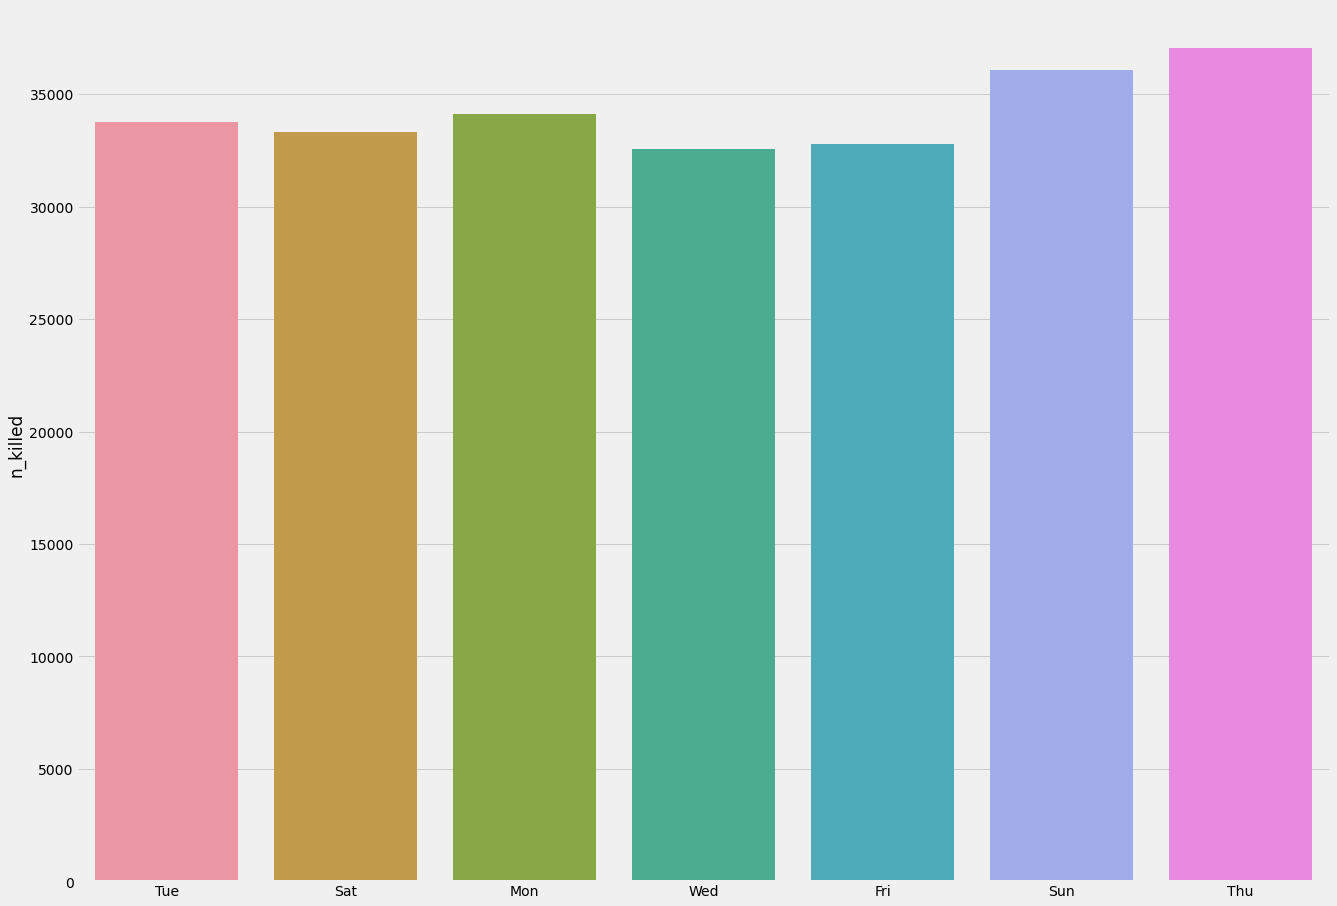

In [49]:
plt.figure(figsize=(20,15))
sns.barplot(x=days, y=n_killed_day)

* Thursdays have the most shootings in a week while wednesdays and fridays have the least shooting within a week
* The max and min shootings on days of the week are close

In [50]:
data_frame.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'year', 'day'],
      dtype='object')

In [51]:
x= data_frame.participant_gender.groupby([data_frame['participant_gender']]).size()

In [52]:
data_frame

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,year,day
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,2013,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,2013,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,2013,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,2013,5
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,0::Unknown,0::Unknown,...,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,NaN,NaN,2018,5
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.0,0::Unknown,0::Unknown,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.0,31.0,2018,5
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.0,0::Unknown,0::Unknown,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,85.0,7.0,2018,5
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.0,0::Unknown,0::Unknown,...,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,149.0,17.0,2018,5


In [59]:
df = data_frame.copy()

In [60]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,year,day
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,2013,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,2013,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,2013,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,2013,5
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,0::Unknown,0::Unknown,...,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,NaN,NaN,2018,5
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.0,0::Unknown,0::Unknown,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.0,31.0,2018,5
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.0,0::Unknown,0::Unknown,...,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,85.0,7.0,2018,5
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.0,0::Unknown,0::Unknown,...,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,149.0,17.0,2018,5


In [63]:
df['month'] = df['date'].dt.month

In [64]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,year,day,month
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,2013,1,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,2013,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,2013,1,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,2013,5,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,2013,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,0::Unknown,0::Unknown,...,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,NaN,NaN,2018,5,3
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.0,0::Unknown,0::Unknown,...,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.0,31.0,2018,5,3
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.0,0::Unknown,0::Unknown,...,0::Male,NaN,NaN,0::Injured,0::Victim,85.0,7.0,2018,5,3
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.0,0::Unknown,0::Unknown,...,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,149.0,17.0,2018,5,3


In [65]:
df1 = pd.DataFrame(data=df, columns=['state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'year', 'day', 'month'])

In [68]:
# df1.to_csv('clean_g_v.csv')